# Analysis of Online News Popularity

**Created by Phillip Efthimion, Scott Pyne, Gino Varghese and John Blevins**

*MSDS 7331 Data Mining - Section 403 - Project 1*

In this notebook a publicly available data set related to the popularities of online news sites will be analyzed.  As part of the analysis the data will be introduced with a description of the source data items, collection strategies, experimental units and populations of interest.  Python data analysis tools will then be used to verify data quality and tidy the data where needed.  Descriptive statistics will be gathered and used to generate visualizaitons which will help in determining any interesting or meaningful relationships.  Finally a basic Principle Components Analysis (PCA) will be performed to assist with a possible dimension reduction strategy before attempting further analysis methods.

## Business Understanding

The data set utilized in this notebook includes data collected about online new articles that can provide interesting insights into the popularity of an article based on article attributes such as word patterns, media content, message sentiment and days of occurance.  The data is originally sourced from Mashable, an online news and social media provider, contains data collectect between 2013 and 2015.    ,   The ability to predict popularity the popularity of a news article before release would be very helpful social media contributors.



## Data Meaning

The data utilized in this notebook are publically accessible from the UCI machine learning repository at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.  The online news data set contains 39,797 data points and 61 attributes including 58 predictive attributes, 2 non-predictive attributes and 1 target attribute.

|Attribute|Data Type|Description|
|---------|---------|-----------|
| url | Text | URL of the article (non-predictive) |
| timedelta | Integer | Days between the article publication and the dataset acquisition (non-predictive) |
| n_tokens_title | Float | Number of words in the title |
| n_tokens_content | Float | Number of words in the content |
| n_unique_tokens | Float | Rate of unique words in the content |
| n_non_stop_words | Float | Rate of non-stop words in the content |
| n_non_stop_unique_tokens | Float | Rate of unique non-stop words in the content |
| num_hrefs | Float | Number of links |
| num_self_hrefs | Float | Number of links to other articles published by Mashable |
| num_imgs | Float | Number of images |
| num_videos | Float | Number of videos |
| average_token_length | Float | Average length of the words in the content |
| num_keywords | Integer | Number of keywords in the metadata |
| data_channel_is_lifestyle | Binary | Is data channel 'Lifestyle'? |
| data_channel_is_entertainment | Binary | Is data channel 'Entertainment'? |
| data_channel_is_bus | Binary | Is data channel 'Business'? |
| data_channel_is_socmed | Binary | Is data channel 'Social Media'? |
| data_channel_is_tech | Binary | Is data channel 'Tech'? |
| data_channel_is_world | Binary | Is data channel 'World'? |
| kw_min_min | Float | Worst keyword (min) |
| kw_max_min | Float | Worst keyword (max) |
| kw_avg_min | Float | Worst keyword (avg) |
| kw_min_max | Float | Best keyword (min) |
| kw_max_max | Float | Best keyword (max) |
| kw_avg_max | Float | Best keyword (avg) |
| kw_min_avg | Float | Avg keyword (min) |
| kw_max_avg | Float | Avg keyword (max) |
| kw_avg_avg | Float | Avg keyword (avg) |
| self_reference_min_shares | Float | Min  of referenced articles in Mashable |
| self_reference_max_shares | Float | Max  of referenced articles in Mashable |
| self_reference_avg_sharess | Float | Avg  of referenced articles in Mashable |
| weekday_is_monday | Binary | Was the article published on a Monday? |
| weekday_is_tuesday | Binary | Was the article published on a Tuesday? |
| weekday_is_wednesday | Binary | Was the article published on a Wednesday? |
| weekday_is_thursday | Binary | Was the article published on a Thursday? |
| weekday_is_friday | Binary | Was the article published on a Friday? |
| weekday_is_saturday | Binary | Was the article published on a Saturday? |
| weekday_is_sunday | Binary | Was the article published on a Sunday? |
| is_weekend | Binary | Was the article published on the weekend? |
| LDA_00 | Float | Closeness to LDA topic 0 |
| LDA_01 | Float | Closeness to LDA topic 1 |
| LDA_02 | Float | Closeness to LDA topic 2 |
| LDA_03 | Float | Closeness to LDA topic 3 |
| LDA_04 | Float | Closeness to LDA topic 4 |
| global_subjectivity | Float | Text subjectivity |
| global_sentiment_polarity | Float | Text sentiment polarity |
| global_rate_positive_words | Float | Rate of positive words in the content |
| global_rate_negative_words | Float | Rate of negative words in the content |
| rate_positive_words | Float | Rate of positive words among non-neutral tokens |
| rate_negative_words | Float | Rate of negative words among non-neutral tokens |
| avg_positive_polarity | Float | Avg polarity of positive words |
| min_positive_polarity | Float | Min polarity of positive words |
| max_positive_polarity | Float | Max polarity of positive words |
| avg_negative_polarity | Float | Avg polarity of positive words |
| min_negative_polarity | Float | Min polarity of positive words |
| max_negative_polarity | Float | Max polarity of positive words |
| title_subjectivity | Float | Title subjectivity |
| title_sentiment_polarity | Float | Title polarity |
| abs_title_subjectivity | Float | Absolute subjectivity level |
| abs_title_sentiment_polarity | Float | Absolute polarity level |
| Number of shares (target) | Integer | Number of Article Shares (tweets, shares, etc...)|

## Verify Data Quality

There are no missing values in the data set. This data set is not a raw dataset and has already been cleaned prior to its upload on the UCI Machine Learning Repository. Therefore, there are no missing values. There are 39,644 records of data over 61 attributes. All of the attributes are non-null floats, except for the attributes ‘url' and ‘shares'. ‘Url' is a non-null object data type and ‘shares’ is a non-null integer data type.

There are some recordist the attribute ‘share’ that are outliers. This due to some posts going viral and gaining a lot of shares. We are not going to consider them mistakes.

To examine the data quality in more details the Pandas and Numpy modules are imported.  The Online New Popularity data set, which is in CSV format, is read into a dataframe using the read_csv() function.  The first 5 rows of data can be shown using the head() function.

In [130]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

df = pd.read_csv('data/OnlineNewsPopularity.csv')

df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Descriptive statistics for each attribute can be obtained using the describe() function.

In [102]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Data type information for each attribute can be show using the info() function.

In [103]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

Although no data is missing there are spaces at the beginning of each column which can cause problems.  These spaces must be removed.

In [104]:
# remove space at beginning of each column name

df.columns = df.columns.str.replace(' ', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

The binary fields for days of week and topic categories are replaced with shorter versions for easier consumption in visualizations.  After renaming the data columns we can view the updated names by running info() function.

In [105]:
# rename days of the week and news article categories

df = df.rename(columns={'weekday_is_monday': 'monday', 'weekday_is_tuesday': 'tuesday', 'weekday_is_wednesday': 'wednesday', 'weekday_is_thursday': 'thursday', 'weekday_is_friday': 'friday', 'weekday_is_saturday': 'saturday', 'weekday_is_sunday': 'sunday', 'is_weekend': 'weekend'})
df = df.rename(columns={'data_channel_is_lifestyle':'lifestyle', 'data_channel_is_entertainment':'entertainment', 'data_channel_is_bus':'business', 'data_channel_is_socmed':'social_media', 'data_channel_is_tech':'technology', 'data_channel_is_world':'world'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                             39644 non-null object
timedelta                       39644 non-null float64
n_tokens_title                  39644 non-null float64
n_tokens_content                39644 non-null float64
n_unique_tokens                 39644 non-null float64
n_non_stop_words                39644 non-null float64
n_non_stop_unique_tokens        39644 non-null float64
num_hrefs                       39644 non-null float64
num_self_hrefs                  39644 non-null float64
num_imgs                        39644 non-null float64
num_videos                      39644 non-null float64
average_token_length            39644 non-null float64
num_keywords                    39644 non-null float64
lifestyle                       39644 non-null float64
entertainment                   39644 non-null float64
business                        39644 non-null float64
social_media

## Descriptive Statistics

For the analysis and modeling of the online new data we will be using Python data analysis tools.  After loading the dataset into Python built-in Pandas functions can be used for displaying simple statistics and matplotlib can be used to constuct basic visualizations showing the relationships between explanatory and response variables.

In [106]:
#import the other packages
warnings.simplefilter('ignore', DeprecationWarning)


New dataframes are created as subsets of the data for days of the week, tokens and channels.

In [107]:
# get a subset of the data for days of the week

# df_day = df[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']]
df_day = df[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']]


df_tokens = df[['n_tokens_title', 'n_tokens_content', 'n_unique_tokens']]

df_channels = df[['lifestyle', 'entertainment', 'business', 'social_media', 'technology', 'world']]

df_day.describe()
#df_tokens.describe()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039
std,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The percentage of posts about social media can be determined.

In [108]:
# percentage of posts about social media
len(df[df.social_media==1])/len(df)*100.0

5.85965089294723

The percentage of posts about technology can also be determined.

In [109]:
# percentage of posts about technology
len(df[df.technology==1])/len(df)*100.0

18.52991625466653

Using matplotlib visualization functions the plots for amount of words in title vs. shares and amount of words in title vs. shares for social media can be generated.

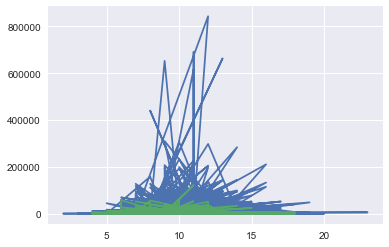

In [110]:
# amount of words in title vs. shares

plt.plot(df.n_tokens_title, df.shares)

# amount of words in title vs. shares for social media
plt.plot(df.n_tokens_title[df.social_media==1], df.shares[df.social_media==1])

Descriptive statistitcs for tokens data frame can be shown using the describe() function.

In [111]:
df_tokens.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens
count,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216
std,2.114037,471.107508,3.520708
min,2.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870
50%,10.000000,409.000000,0.539226
75%,12.000000,716.000000,0.608696
max,23.000000,8474.000000,701.000000


Using matplotlib visualization functions the plot amount of words in the title vs. number of shares.  The plot shows us that there is no real correlation between the number of words in the title of articles and how many shares they get.

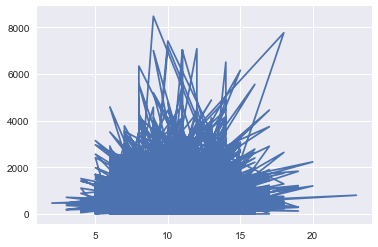

In [112]:
# The amount of words in the title vs. number of shares
plt.plot(df_tokens.n_tokens_title, df_tokens.n_tokens_content)

# The plot shows us that there is no real correlation between the number of words in the title of articles and how many shares they get.

To determine whether social media or technology articles get more likes the average number of shares for social media articles for both can be determined.

In [113]:
np.mean(df[df.social_media==1].shares)

3629.383125269049

In [114]:
np.mean(df[df.technology==1].shares)

3072.283283419548

Therefore, social media articles are shared more times than technology articles, on average.

The words to images ratio can also be calculated.

In [115]:
np.mean(df.n_tokens_content / (df.num_imgs + 1)) # 1 added to denominator to prevent division by 0.

201.86719365551602

On average, the ratio of the number of words in an article per image is 201.87.

The words to images ratio for social media articles can be calculated.

In [116]:
np.mean(df[df.social_media==1].n_tokens_content / (df[df.social_media==1].num_imgs + 1)) # 1 added to denominator to prevent division by 0.

217.17720937193357

On average, the ratio of the number of words in an article per image is 217.177.


The words to images ratio for technology articles can be calculated.

In [117]:
np.mean(df[df.technology==1].n_tokens_content / (df[df.technology==1].num_imgs + 1)) # 1 added to denominator to prevent division by 0.


185.32547223323883

On average, the ratio of the number of words in an article per image is 185.325.  This means that technology articles either have

The median number of total links in each article can be calculated.

In [118]:
np.median(df.num_hrefs)

8.0

The median number of links to other mashable articles in the each article can be calculated.

In [119]:
np.median(df.num_self_hrefs)

3.0

The range of the number of words in an article can be calculated.

In [120]:
np.max(df.n_tokens_content) - np.min(df.n_tokens_content)

8474.0

The variance in the number of shares for social media versus technology articles can be calculated.

In [121]:
# Variance of shares for social media articles
np.var(df[df.social_media==1].shares)

30503285.451148584

In [122]:
# Variance of shares for technology articles
np.var(df[df.technology==1].shares)

81427694.93241084

We can see that there is more variance in the number of shares for technology articles as social media articles by a factor of roughly 2.5.

The mean number of shares of social media articles can be calculated.

In [123]:
np.mean(df[df.social_media==1].shares)

3629.383125269049

The mean number of shares of technology articles can be calculated.

In [124]:
np.mean(df[df.technology==1].shares)



3072.283283419548

On average, articles about social media get shared more than articles about technology.  As shown above, articles about social media also are less variable.  This means that articles about social media are more likely to be shared than articles about technology.  However, articles about technology could potentially become more viral (or shared much less) than articles about social media.

## Data Visualization and Attribute Relationships

In [125]:
plt.rcParams['figure.figsize']=(15,10)

Apply the function to the weekday column

In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                             39644 non-null object
timedelta                       39644 non-null float64
n_tokens_title                  39644 non-null float64
n_tokens_content                39644 non-null float64
n_unique_tokens                 39644 non-null float64
n_non_stop_words                39644 non-null float64
n_non_stop_unique_tokens        39644 non-null float64
num_hrefs                       39644 non-null float64
num_self_hrefs                  39644 non-null float64
num_imgs                        39644 non-null float64
num_videos                      39644 non-null float64
average_token_length            39644 non-null float64
num_keywords                    39644 non-null float64
lifestyle                       39644 non-null float64
entertainment                   39644 non-null float64
business                        39644 non-null float64
social_media

In [129]:
#adding a new weekday column
df['weekday'] = df.apply(lambda row: label_weekday(row),axis=1)

NameError: ("name 'label_weekday' is not defined", 'occurred at index 0')

Review the newly created column, to verify the data type

In [128]:
df[['weekday']].info()

KeyError: "['weekday'] not in index"

Reviewed the unique data values in the column weekday

In [ ]:
#review if the newly added column, had unique data from Monday..to..Sunday
df.weekday.unique()

Created a new column called "popularity", the shares data point was split into either Low, Medium or High equal-sized buckets based on rank or based on sample quantiles.

In [ ]:
# limiting to columns that are needed for visualization
df_subset = df[['num_imgs','num_videos','num_keywords','popularity','weekday','shares']].copy()
df_subset.info()

In [ ]:
# creating different cross tabs to perform further analysis
df_popularity = pd.crosstab([df['popularity']], df.shares.count())
df_week = pd.crosstab([df['weekday']], df.shares.count())
df_corr = pd.crosstab([df['popularity'], df['weekday']], df.shares.count())

In [ ]:
print (df_popularity)

In [ ]:
print (df_week)

In [ ]:
df_popularity.plot(kind='barh')

In this plot we split the column shares into equal-sized buckets based on rank or based on sample quantiles and labelled them as low, medium, high.[Low < Medium < High]. In this bar chart we are graphing the count of tweets against the number of times the tweet was shared. This is tracked in the popularity column as High, Medium and Low. We can see that the Low popularity had more counts because most of the articles fall under that criteria, due to the fact that they dont get shared as much.

In [ ]:

df_weekstk = df_week.stack().reset_index().rename(columns={0:'value'})
ax = sns.barplot(x=df_weekstk.weekday, y=df_weekstk.value,order=["Monday", "Tuesday","Wednesday", "Thursday","Friday", "Saturday","Sunday"])


In this bar chart we are graphing the count of tweets against the day the article was published (day of the week). This is tracked in the weekday column. We can see that articles published on Tuesday, Wednesday and Thursday get shared more than any other day of the week

In [ ]:
ax = sns.boxplot(x="weekday", y="shares",data=df_subset)

From the above box plot, we wanted to identifying any outliers and perform some comparisons by weekday. As we can see there are some extreme outliers present in the data, among them the data set for Monday, Tuesday, Wednesday and Saturday have extreme spread. From this we can speculate that there is no guarantee that an article will be shared more depending on the weekday it was published

In [ ]:
ax = sns.boxplot(x="popularity", y="num_videos",data=df_subset)

Similarly to the previous box plot, we wanted to identify any outliers when comparing by popularity, as we can see all the three outcomes had extreme outliers, among them "high" had extreme spread.

In [ ]:
ax = sns.boxplot(x="weekday", y="num_imgs",hue="popularity",data=df_subset)

Similarly to the previous box plot, we wanted to identify any outliers when comparing articles with number of images by weekday, as we can see all the outcomes had extreme outliers.

In [ ]:
sns.pairplot(df_subset,hue='popularity')

In [ ]:
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(df_subset, figsize=(15,10))

Scatterplot matrix and the pairplot matrix are showing us similar information, these plots helped us to understand correlation as Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other. Data is not spread out in a linear fashion when looking at these plots, at most the data points are clumped to the left, bottom corner of the graph. This shows that there is no valid correlation between the number of images increases the popularity to be "High" etc.

In [ ]:
sns.violinplot(x="popularity", y="num_imgs",data=df_subset)


In this plot we are graphing the number of images present in an article to it popularity. Similar to box plot, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories". from the above plot we can see how the density of data decreases as the popularity increases.

In [ ]:
sns.violinplot(x="weekday", y="shares",data=df_subset)

In this plot we are graphing the count of articles shared to the day it was published. From the violin plot we can see more data density for Tuesday, Friday and Sunday.

In [ ]:
sns.violinplot(x="popularity", y="num_keywords",data=df_subset)

In this plot we are graphing number of keywords present in the article to its popularity. From the violin plot we can see similar data density for each of the popularity criteria.

In [ ]:
sns.heatmap(df_corr)

From the heatmap we can see that the Low popularity should be a darker shade, because there are more articles that fall under that criteria.Which means some articles only got shared a couple of times, and from the plot we can see that Wednesdays are when articles get read and shared, however this does not mean the article is popular, it only means the article was read and it appealed to certain crowd.

## Interesting Features

The most interesting feature about the data was the counter-intuitive statistic that merely performing the A1C test slightly reduced the readmission rate (about 2%).  

The other interesting feature was that the Caucasian and African American statistics on readmission were very similar, at least among diabetic patients.  I had read that African Americans are more likely to have health problems than Caucasians, but this showed that, at least among diabetics, they were rehospitalized at the same rates after their initial hospital visit.

The fact that Asians are very noticeably healthier than the other ethnic group was also interesting.  My wife is Asian and diabetic.  Perhaps it is their diet?


## Other Features That Could Be Added

There are 45 more attributes in the data set that could be explored. 

I would be interested in revisiting it and using some of the data reduction techniques discussed in class to consolidate them and see how they affect the readmission rates.  For example, there were many medications that could be correlated against the readmission rate.  And the medical diagnosis codes could be grouped and quantified. Unfortunately I ran out of time on this assignment, and was unable to pursue it further.


## PCA Analysis

### Data Preparation for PCA

First remove non-predictive variables ('url', ' timedelta')

In [133]:
df_drop=df.drop(labels=['url',' timedelta'],axis=1)
df_drop.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Generate a list of columns in the updated dataframe.

In [134]:
cols = df_drop.columns.tolist()
cols

[' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 

Moves our response variable ' shares' to the first position(index 0)

In [135]:
cols.insert(0, cols.pop(cols.index(' shares')))
cols

[' shares',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negati

Re-index dataframe on new columns.

In [136]:
df_drop = df_drop.reindex(columns= cols)
df_drop.head()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,593,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,711,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,1500,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,1200,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,505,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


Assign Explanatory variables and Response variables to x and y.  Print the new dataframe dimension data.

In [139]:
X = df_drop.iloc[:,1:59].values
y = df_drop.iloc[:,0].values
X
np.shape(X)

(39644, 58)

Print dimension data for y variable.

In [140]:
y
np.shape(y)

(39644,)

### PCA on all the variables

Uses the StandarScaler in sklearn to transform the data in preperation for PCA and than ran PCA to determine a suitable number of components to explain the variance.

In [141]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

A sample plot shows cumulative explained variance versus number of components.

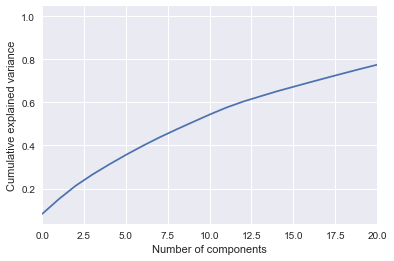

In [142]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Analysis

Initially I only ran PCA and graphed the first 10 Principal Components, this resulted in explaining less than 60% of the variance. I ran it a few more times and decided that around 20 Components is where the returns in explained covariance begins to diminish. With close to 80% of the variance explained using only 20 principal components, we are able to reduce the dimensionality of the data from 58 variables down to 20. This will help us when deciding what type of predictive analysis to run because we are able to explore a smaller number of features.
While exploring the data it is worth noting that some of the variables in the original data are LDA components that were generated from the other features of the data set. I am not sure if these should be included in the PCA but I decided to leave them in because I could not find evidence that they should be removed. With more time devoted to PCA I think that the number of components necessary to explain a large portion of the variance could be reduced further.
Another data concern is that the dummy variables that are included may not be suitable for PCA. It was difficult to find an answer on if binary variables(0,1 dummies) were appropriate for PCA. I would like to further explore PCA on different subsets of this data to see if the dimensions can be reduced while explaining as much variance as possible (preferably > 90%).

### LDA Features Visualized

In a similar fashion LDA analysis plot can be generated.

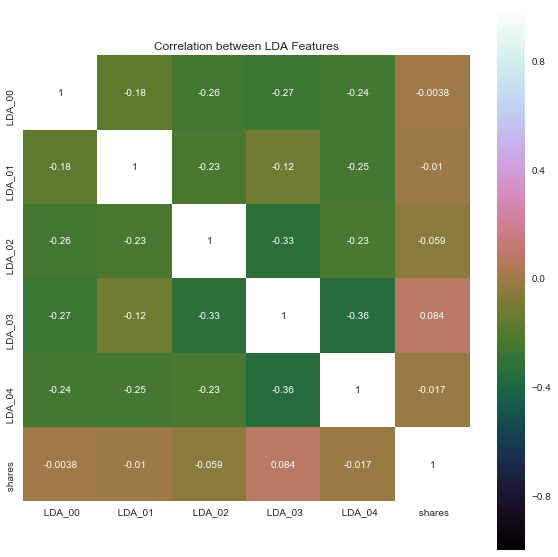

In [146]:

correlation = df[[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',' shares']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between LDA Features')